# **The Sparks Foundation - Data Science & Business Analytics Internship**


## TASK 1 - Prediction using Supervised Machine Learning


### Author - DEEPAK BHARDWAJ



In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.



### **Importing the dataset**


In [11]:
# Importing all the required libraries

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns 

# To ignore the warnings 
import warnings as wg
wg.filterwarnings("ignore")

In [12]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(7)



Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


In [13]:
df.shape


(25, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
df.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the dataset


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

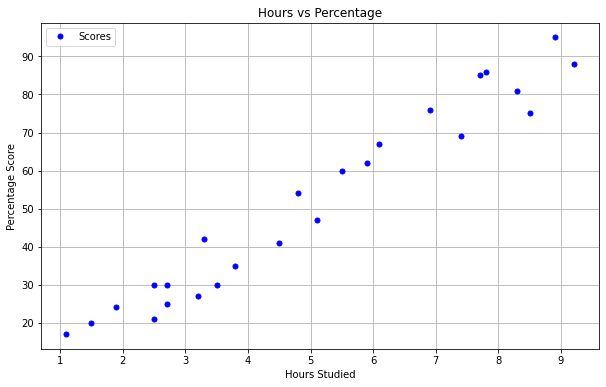

In [19]:
# Plotting the dataset
plt.rcParams["figure.figsize"] = [10,6]
df.plot(x='Hours', y='Scores', style='.', color='blue', markersize=10)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [21]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [27]:
X = df.iloc[:, :1].values  
y = df.iloc[:, 1:].values

In [28]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [29]:
from sklearn.linear_model import LinearRegression  

model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

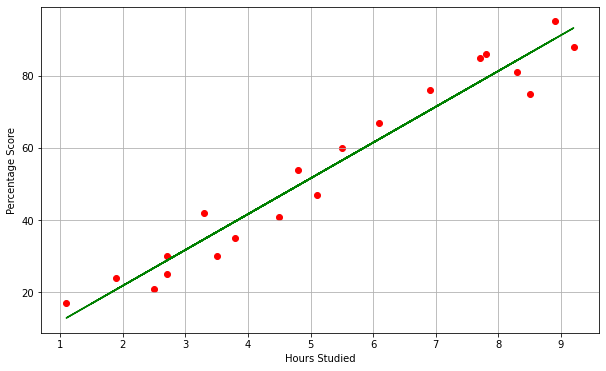

In [30]:
line = model.coef_*X + model.intercept_

# Plotting for the training data
plt.rcParams["figure.figsize"] = [10,6]
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='green');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [32]:
print(X_test) # Testing data - In Hours
y_pred = model.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [0]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [33]:
# Testing with your own data

hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
